
1. For training data:____________________________________


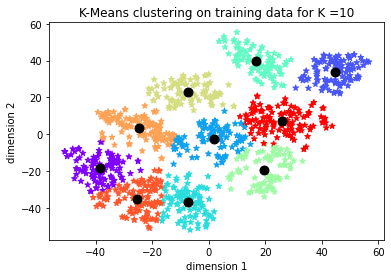

Purity score = 0.69

For test data:___________________________________________


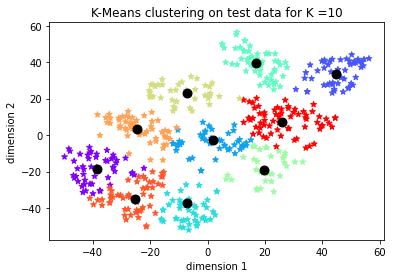

Purity score = 0.676

2. For training data:_________________________________


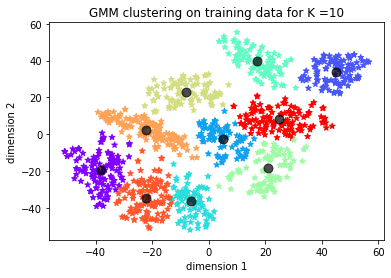

Purity score = 0.708

For test data:______________________________________________


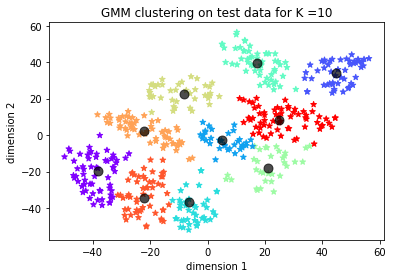

Purity score = 0.704

3. --------------------------------------------------


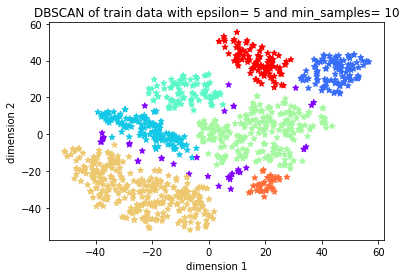

Purity score = 0.585


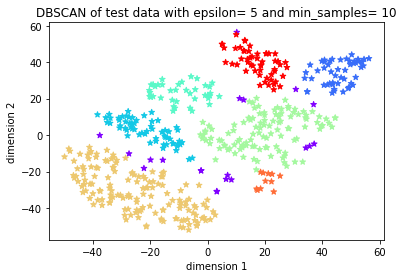

Purity score = 0.584

--------------------Bonus Question (A)----------------------------


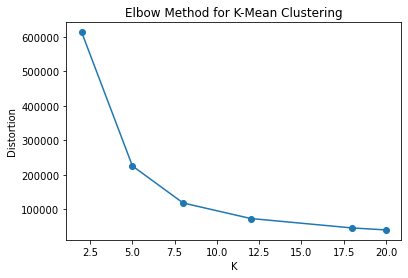

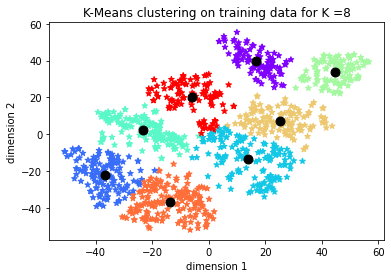

Purity score = 0.63


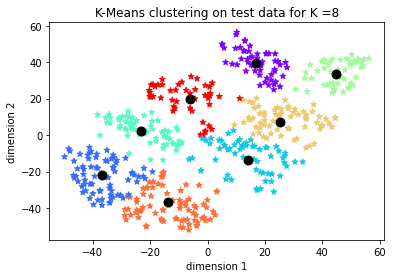

Purity score = 0.624


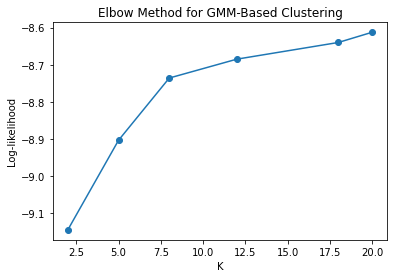

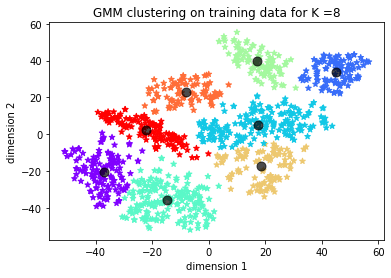

Purity score = 0.629


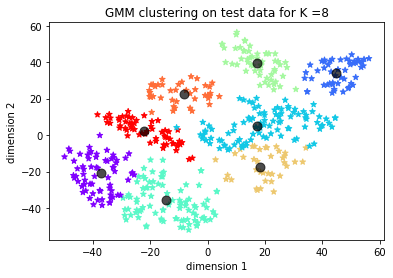

Purity score = 0.628

-----------------Bonus Question (B)----------------------------


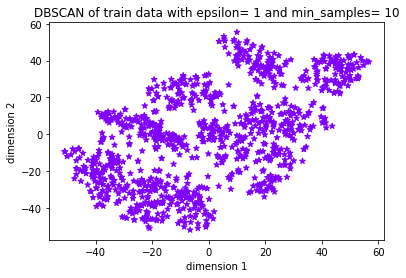

Purity score = 0.1


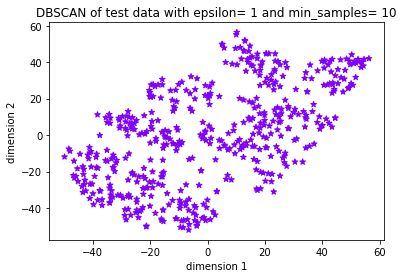

Purity score = 0.1


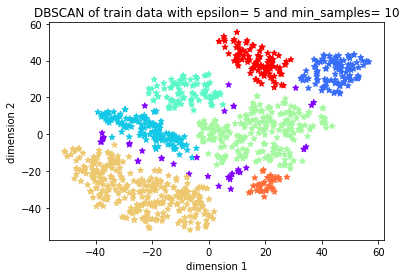

Purity score = 0.585


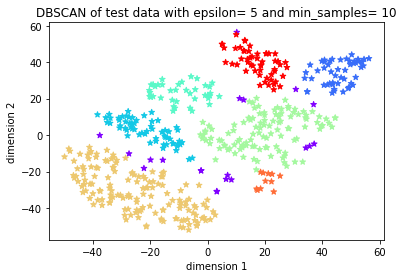

Purity score = 0.584


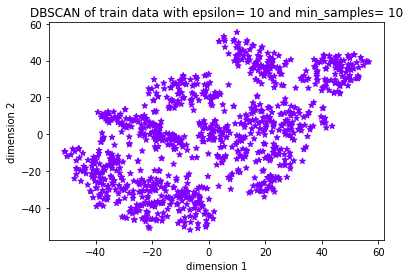

Purity score = 0.1


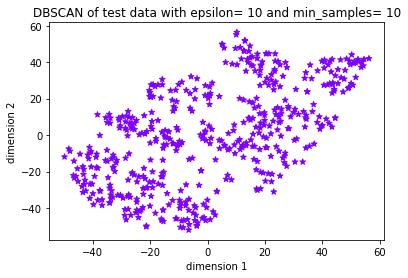

Purity score = 0.1


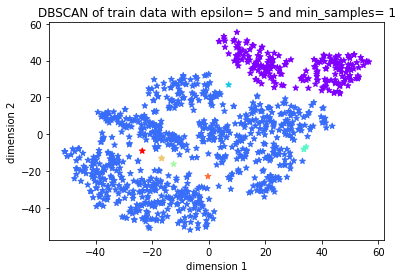

Purity score = 0.208


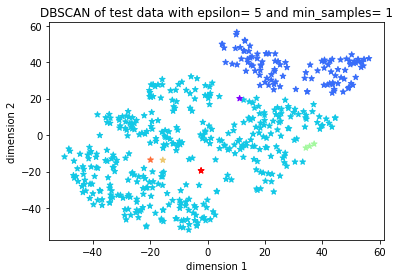

Purity score = 0.212


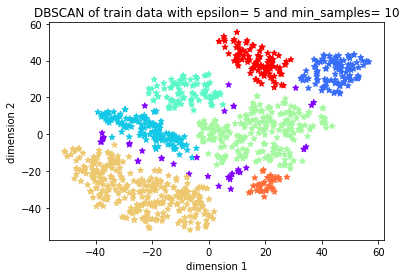

Purity score = 0.585


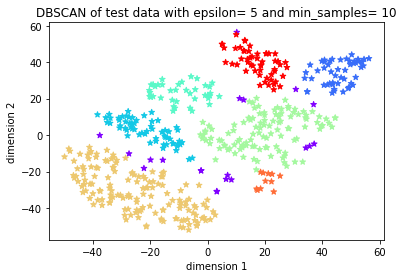

Purity score = 0.584


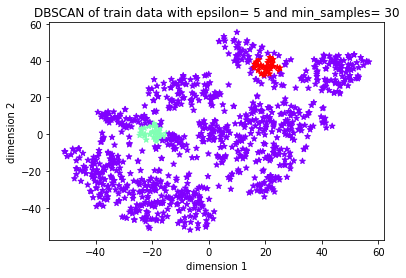

Purity score = 0.158


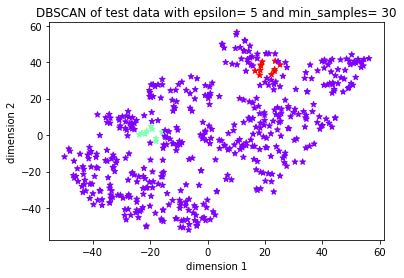

Purity score = 0.14


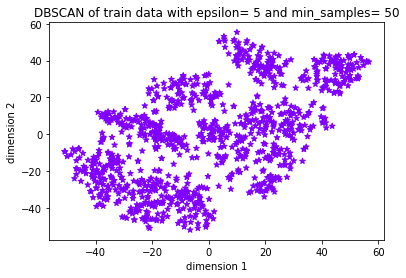

Purity score = 0.1


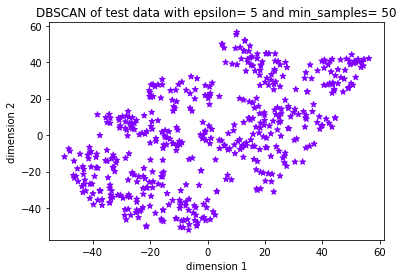

Purity score = 0.1


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 22 16:31:40 2020

@author: Rashmi, B19218
Ph no. : 7015331137
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import scipy as sp
from scipy import spatial as spatial

train = pd.read_csv('mnist-tsne-train.csv')
test = pd.read_csv("mnist-tsne-test.csv")

X = np.array([list(train['dimention 1']),list(train['dimension 2'])])
Y = np.array([list(test['dimention 1']),list(test['dimention 2'])])

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix=metrics.cluster.contingency_matrix(y_true, y_pred)
    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
    # Return cluster accuracy
    return contingency_matrix[row_ind,col_ind].sum()/np.sum(contingency_matrix)
    

def k_means_train(K):
    global kmeans
    kmeans = KMeans(n_clusters=K,random_state=(42))
    kmeans.fit(X.T)
    centers =kmeans.cluster_centers_
    kmeans_prediction_train = kmeans.predict(X.T)
    
    plt.scatter(X.T[:,0],X.T[:,1], c=kmeans_prediction_train, cmap='rainbow',marker = '*')
    plt.scatter(centers[:,0],centers[:,1],s = 80,c = 'black', marker = 'o') 
    plt.xlabel('dimension 1')
    plt.ylabel('dimension 2')
    plt.title('K-Means clustering on training data for K ='+str(K))
    plt.show()
    
    print('Purity score =',purity_score(train["labels"], kmeans_prediction_train))

def k_means_test(K):   
    kmeans = KMeans(n_clusters=K,random_state=(42))
    kmeans.fit(X.T)
    centers =kmeans.cluster_centers_
    kmeans_prediction_test = kmeans.predict(Y.T)

    plt.scatter(Y.T[:,0],Y.T[:,1], c=kmeans_prediction_test, cmap='rainbow',marker = '*')
    plt.scatter(centers[:,0],centers[:,1],s = 80,c = 'black', marker = 'o')
    plt.xlabel('dimension 1')
    plt.ylabel('dimension 2')
    plt.title('K-Means clustering on test data for K ='+str(K))
    plt.show()
       
    print('Purity score =',purity_score(test["labels"], kmeans_prediction_test))                           


def Gmm_clustering_train(K):
    gmm = GaussianMixture(n_components = K,random_state=(42))
    gmm.fit(X.T)
    GMM_prediction_train = gmm.predict(X.T)
    
    centers= gmm.means_
    
    plt.scatter(X.T[:,0],X.T[:,1], c=GMM_prediction_train, cmap='rainbow',marker = '*')
    plt.scatter(centers[:,0],centers[:,1],c='black',s=80,alpha=0.7)
    plt.xlabel('dimension 1')
    plt.ylabel('dimension 2')
    plt.title('GMM clustering on training data for K ='+str(K))
    plt.show()
    
    print('Purity score =',purity_score(train["labels"], GMM_prediction_train))
    
def Gmm_clustering_test(K):    
    gmm = GaussianMixture(n_components = K,random_state=(42))
    gmm.fit(X.T)
    GMM_prediction_test = gmm.predict(Y.T)
    
    centers = gmm.means_

    plt.scatter(Y.T[:,0],Y.T[:,1], c=GMM_prediction_test, cmap='rainbow',marker = '*')
    plt.scatter(centers[:,0],centers[:,1],c='black',s=80,alpha=0.7)
    plt.xlabel('dimension 1')
    plt.ylabel('dimension 2')
    plt.title('GMM clustering on test data for K ='+str(K))
    plt.show()
            
    print('Purity score =',purity_score(test["labels"], GMM_prediction_test))


def dbscan(epsilon,min_sample):
    dbscan_model = DBSCAN(eps=epsilon, min_samples=min_sample).fit(X.T)
    DBSCAN_predictions = dbscan_model.labels_
    
    plt.scatter(X.T[:,0], X.T[:,1], c=DBSCAN_predictions, cmap='rainbow',marker = '*',label = 'center')
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    title = "DBSCAN of train data with epsilon= " + str(epsilon) + " and min_samples= " + str(min_sample)
    plt.title(title)
    plt.show()
    
    print('Purity score =',purity_score(train["labels"], DBSCAN_predictions))
    
    
    def dbscan_predict(dbscan_model, X_new, metric=spatial.distance.euclidean):
        # Result is noise by default
        y_new = np.ones(shape=len(X_new), dtype=int)*-1 
        # Iterate all input samples for a label
        for j, x_new in enumerate(X_new):
            # Find a core sample closer than EPS
            for i, x_core in enumerate(dbscan_model.components_):
                if metric(x_new, x_core) < dbscan_model.eps:
                    # Assign label of x_core to x_new
                    y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                 
                    break
        return (y_new)
    
    dbscan_model_test=DBSCAN(eps=epsilon, min_samples=min_sample).fit(X.T)     
    DBSCAN_predictions_test = dbscan_predict(dbscan_model_test,Y.T)
    
    plt.scatter(Y.T[:,0], Y.T[:,1], c=DBSCAN_predictions_test, cmap='rainbow',marker = '*',label = 'center')
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    title = "DBSCAN of test data with epsilon= " + str(epsilon) + " and min_samples= " + str(min_sample)
    plt.title(title)
    plt.show()
       
    print('Purity score =',purity_score(test["labels"], DBSCAN_predictions_test))

# 1(a),(b)
print('\n1. For training data:____________________________________')
k_means_train(10)
# (c),(d)
print('\nFor test data:___________________________________________')
k_means_test(10)

# 2(a),(b)
print('\n2. For training data:_________________________________')
Gmm_clustering_train(10)
# (c),(d)
print('\nFor test data:______________________________________________')
Gmm_clustering_test(10)

# 3.
print('\n3. --------------------------------------------------')    
dbscan(5,10)


# Bonus Question (A) 
print('\n--------------------Bonus Question (A)----------------------------')
def distortion(K): #  K-means clustering
    kmeans = KMeans(n_clusters=K,random_state=(42))
    kmeans.fit(X.T)
    distortion=kmeans.inertia_
    return distortion
    
l=[]
k=[2,5,8,12,18,20]
for i in k:
    l.append(distortion(i))
    
plt.plot(k,l,marker='o')
plt.title('Elbow Method for K-Mean Clustering')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

# K-means for optimum number of clusters
k_means_train(8)
k_means_test(8)

# GMM-based clustering    
def likelihood(K):
    gmm = GaussianMixture(n_components = K,random_state=(42))
    gmm.fit(X.T)
    return gmm.lower_bound_

l1=[]    
for i in k:
    l1.append(likelihood(i))

plt.plot(k,l1,marker='o')
plt.title('Elbow Method for GMM-Based Clustering')
plt.xlabel('K')
plt.ylabel('Log-likelihood')
plt.show()

# GMM for optimum number of clusters
Gmm_clustering_train(8)
Gmm_clustering_test(8)
    
# Bonus Question (B) 
print('\n-----------------Bonus Question (B)----------------------------')
e=[1,5,10]
minSamples=[1,10,30,50]

for i in e:
    dbscan(i,10)
for i in minSamples:
    dbscan(5,i)



